# Binary Classification - Credit Approval

Dataset:
https://archive.ics.uci.edu/ml/datasets/Credit+Approval

## Dataset observations

https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names

- Class distribution is quite balanced
- Columns are anonymized
- There are missing values

## Workflow

Data Gathering
1. read_csv

Data Transformation
2. transform dataframe
3. PCA to plot (for classification)
4. train-test split
5. scale

Training
6. logistic regression
7. SGD logistic regression

Validation
8. metrics
9. learning curve
10. prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve

## Data Gathering

1. read_csv

In [42]:
df = pd.read_csv('C:\\courses\\data\\credit-approval\\crx.data',
                names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6',
                      'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
                      'A13', 'A14', 'A15', 'y'],
                na_values=['?', 'nan'])
df.dropna(inplace=True)
df.head()
df.y.unique()

array(['+', '-'], dtype=object)

In [43]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
y       object
dtype: object

In [44]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,y
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


## Data Transformation
2. transform dataframe
3. PCA to plot (for classification)
4. train-test split
5. scale

In [45]:
df.A1.unique()
df.A1.head()

0    b
1    a
2    a
3    b
4    b
Name: A1, dtype: object

In [46]:
pd.get_dummies(df.A1).head()

,a,b
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [47]:
pd.get_dummies?

In [48]:
columns_to_encode = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
np.testing.assert_array_equal(columns_to_encode, df.loc[:, columns_to_encode].columns)

dummies = pd.get_dummies(df.loc[:, columns_to_encode])
dummies.columns

Index(['A1_a', 'A1_b', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p',
       'A6_aa', 'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j',
       'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd',
       'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A9_f', 'A9_t',
       'A10_f', 'A10_t', 'A12_f', 'A12_t', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

In [49]:
df_1 = pd.concat([df, dummies], axis=1)
df_1.drop(columns_to_encode,axis=1,inplace=True)
df_1.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'y', 'A1_a', 'A1_b', 'A4_l',
       'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc',
       'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r',
       'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n',
       'A7_o', 'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f',
       'A12_t', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')

In [50]:
y_enc = df_1.y.map({'+': 1, '-': 0})
y_enc

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
659    0
660    0
661    0
662    0
663    0
664    0
665    0
666    0
667    0
668    0
669    0
670    0
671    0
672    0
674    0
675    0
676    0
677    0
678    0
679    0
680    0
681    0
682    0
683    0
684    0
685    0
686    0
687    0
688    0
689    0
Name: y, Length: 653, dtype: int64

In [52]:
df_1.drop(['y'], axis=1, inplace=True) # drop the original y column
df_2 = pd.concat([df_1, y_enc], axis=1) # add the encoded y column
df_2.columns

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1_a', 'A1_b', 'A4_l', 'A4_u',
       'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc', 'A6_d',
       'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r', 'A6_w',
       'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n', 'A7_o',
       'A7_v', 'A7_z', 'A9_f', 'A9_t', 'A10_f', 'A10_t', 'A12_f', 'A12_t',
       'A13_g', 'A13_p', 'A13_s', 'y'],
      dtype='object')

In [53]:
X = df_2.loc[:, 'A2':'A13_s']  # X = df_2.drop(['y'], axis=1)
y = df_2.y

scaler = StandardScaler()
X_pca = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_pca)

print(X_pca.shape, X_2d.shape)

(653, 46) (653, 2)


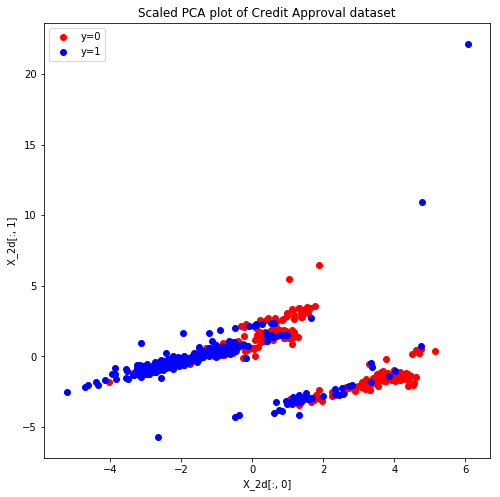

In [54]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

ax.scatter(X_2d[y==0, 0], X_2d[y==0, 1], color='r', label='y=0')
ax.scatter(X_2d[y==1, 0], X_2d[y==1, 1], color='b', label='y=1')
ax.set(xlabel='X_2d[:, 0]', ylabel='X_2d[:, 1]',
       title='Scaled PCA plot of Credit Approval dataset')
ax.legend()

In [55]:
# train test split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# scale X based on training mean & variance
# (y is already class 0, 1 = don't scale)
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(489, 46) (164, 46) (489,) (164,)


## Training
6. logistic regression
7. SGD logistic regression

In [61]:
logistic = LogisticRegression(random_state=42)
logistic.fit(train_X_scaled, train_y)

pred = logistic.predict(test_X_scaled)

cm = confusion_matrix(test_y, pred)
print(cm)

[[77 18]
 [ 9 60]]


In [60]:
sgd = SGDClassifier(random_state=42, tol=1e-3, max_iter=1000)

sgd.fit(train_X_scaled, train_y)

pred_sgd = sgd.predict(test_X_scaled)
pred_sgd

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

[Text(0,0.5,'Denied'), Text(0,1.5,'Approved')]

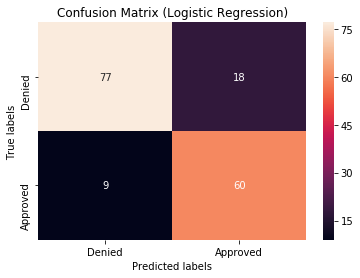

In [62]:
# matplotlib can plot confusion matrices, isn't as easy as seaborn

# conda install -y seaborn

import seaborn as sns

fig, ax = plt.subplots()

# annotate cells with ticks
sns.heatmap(cm, annot=True, ax=ax)

ax.set(xlabel='Predicted labels', ylabel='True labels', title='Confusion Matrix (Logistic Regression)') 
ax.xaxis.set_ticklabels(['Denied', 'Approved'])
ax.yaxis.set_ticklabels(['Denied', 'Approved'])

In [63]:
print(classification_report(test_y,pred))

             precision    recall  f1-score   support

          0       0.90      0.81      0.85        95
          1       0.77      0.87      0.82        69

avg / total       0.84      0.84      0.84       164



In [66]:
logistic.score(test_X_scaled,test_y)

0.8353658536585366

In [65]:
test = test_X_scaled
truth = test_y.values

pred_lr = logistic.predict(test)

print('Number of mislabeled points out of %d points:' % test.shape[0])
print('Logistic Regression: %d, Mean Accuracy: %.3f' % ((truth != pred_lr).sum(),
                                              logistic.score(test, truth)))
print((164-27)/164)

Number of mislabeled points out of 164 points:
Logistic Regression: 27, Mean Accuracy: 0.835
0.8353658536585366


## Validation
8. metrics
9. learning curve
10. prediction